### co-lab 환경 보기

~~~
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)
~~~
### 램 속도 체크
~~~
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')
~~~

In [1]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.express as px
import cufflinks as cf
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.style.use(['ggplot'])
mpl.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54620 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44544 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53580 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49828 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53944 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50857 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph

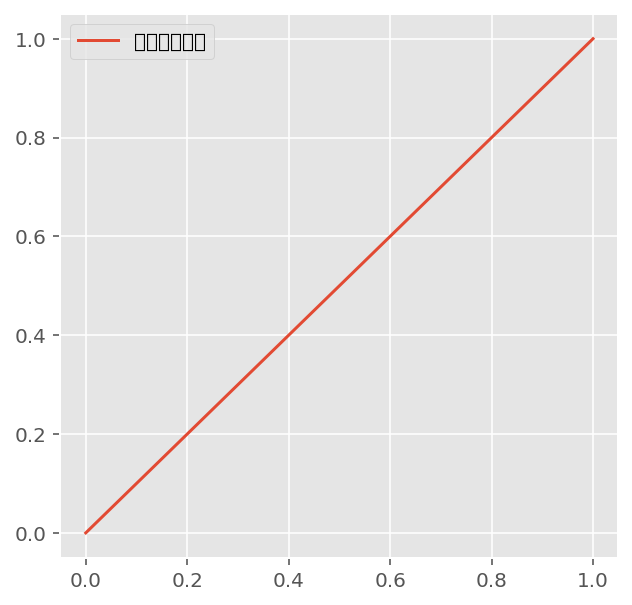

In [3]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

# 한글 안나오면 런타임 -> 다시시작 및 모두실행 클릭

In [4]:
shall = pd.read_csv("//content/drive/My Drive/shinhan/SHcard/KCTI_NATIVE_ALL.txt", sep='|', header=0, encoding="CP949")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.



In [5]:
shall_not = shall[shall['v1'] != '경기']

In [7]:
shall_not.v1.unique()

array(['세종', '충남', '대전', '서울', '충북', '부산', '울산', '경남', '광주', '대구', '경북',
       '전남', '강원', '인천', '전북', '제주'], dtype=object)

In [8]:
shall_not.to_csv("./경기없앤데이터.csv")

In [ ]:
sh2017 = pd.read_csv("//content/drive/My Drive/shinhan/SHcard/KCTI_NATIVE_2017.txt", sep='|', header=0, encoding="CP949")
sh2018 = pd.read_csv("//content/drive/My Drive/shinhan/SHcard/KCTI_NATIVE_2018.txt", sep='|', header=0, encoding="CP949")
sh2019 = pd.read_csv("//content/drive/My Drive/shinhan/SHcard/KCTI_NATIVE_2019.txt", sep='|', header=0, encoding="CP949")
sh2020 = pd.read_csv("//content/drive/My Drive/shinhan/SHcard/KCTI_NATIVE_2020.txt", sep='|', header=0, encoding="CP949")

KeyboardInterrupt: ignored

In [ ]:
shnot2020 = pd.concat([sh2017, sh2018, sh2019])

In [ ]:
shall['cln_age_r'] = shall['cln_age_r'].astype(str)
shall['cln_age_r'].unique()

array(['30', '50', '40', '60', '20', '기타'], dtype=object)

In [ ]:
 shall['divide'] = (shall['usec'] / sum(shall['usec']))

In [ ]:
shall.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec,divide
0,세종,세종,.,취미오락,외식,M,30,201701,RED,활동,351296766.0,19010,5.977239e-07
1,세종,세종,.,취미오락,종합쇼핑,M,50,201701,RED,휴식,72244196.0,2375,7.467618e-08
2,세종,세종,.,취미오락,종합쇼핑,M,30,201701,WHITE,휴식,532911085.0,19979,6.281918e-07
3,충남,세종,.,취미오락,종합쇼핑,M,50,201701,WHITE,활동,50972534.0,951,2.990192e-08
4,충남,세종,.,취미오락,종합쇼핑,M,40,201701,RED,휴식,19104457.0,408,1.282858e-08


In [ ]:
df1 = shall.groupby(['v2','sex_ccd'])['usec'].sum()

## 지역 별로 성별 비율 확인하기
 - 1. 지역과 usec 기준으로 성별 sum
 - 2. usec 기준으로 성별 sum
 - 3. 1번값을 분자, 2번값을 분모로 나눈기
 - 4. plot

In [ ]:
df1

v2  sex_ccd
강원  F           335911500
    M           448825980
경기  F          3479907693
    M          3764616769
경남  F           387199503
    M           526336508
경북  F           287698380
    M           449596743
광주  F           234205496
    M           268701575
대구  F           406074027
    M           460205877
대전  F           433736690
    M           487447024
부산  F           592434875
    M           653545778
서울  F          7477084652
    M          6339664848
세종  F            47695021
    M            60917693
울산  F           160080676
    M           236443392
인천  F           673098487
    M           749261218
전남  F           183481275
    M           265469690
전북  F           217194146
    M           286742519
제주  F           158243242
    M           175201307
충남  F           290574883
    M           445287296
충북  F           358753796
    M           462343771
Name: usec, dtype: int64

In [ ]:
df2 = shall.groupby(['v2'])['usec'].sum()

In [ ]:
df3 = df1/df2

In [ ]:
df3

v2  sex_ccd
강원  F          0.428056
    M          0.571944
경기  F          0.480350
    M          0.519650
경남  F          0.423847
    M          0.576153
경북  F          0.390208
    M          0.609792
광주  F          0.465703
    M          0.534297
대구  F          0.468756
    M          0.531244
대전  F          0.470847
    M          0.529153
부산  F          0.475477
    M          0.524523
서울  F          0.541161
    M          0.458839
세종  F          0.439129
    M          0.560871
울산  F          0.403710
    M          0.596290
인천  F          0.473227
    M          0.526773
전남  F          0.408689
    M          0.591311
전북  F          0.430995
    M          0.569005
제주  F          0.474571
    M          0.525429
충남  F          0.394877
    M          0.605123
충북  F          0.436920
    M          0.563080
Name: usec, dtype: float64

In [ ]:
df3.unstack()

sex_ccd,F,M
v2,,
강원,0.428056,0.571944
경기,0.480350,0.519650
경남,0.423847,0.576153
경북,0.390208,0.609792
광주,0.465703,0.534297
대구,0.468756,0.531244
대전,0.470847,0.529153
부산,0.475477,0.524523
서울,0.541161,0.458839


<Figure size 864x216 with 0 Axes>

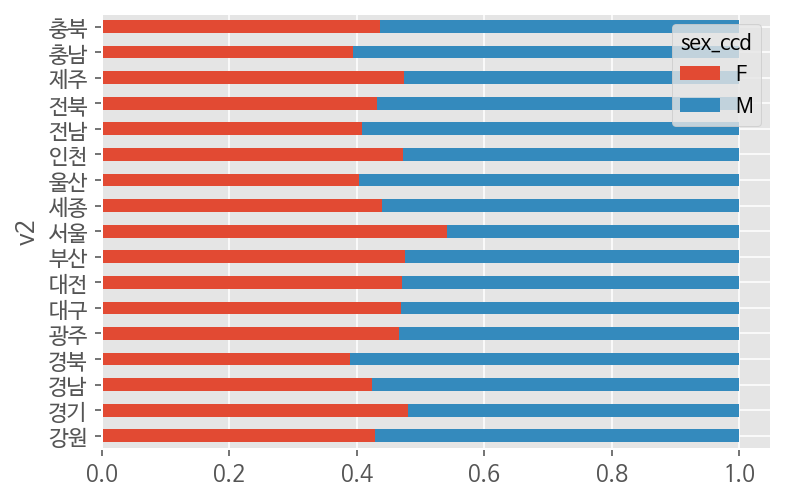

In [ ]:
plt.figure(figsize=(12, 3))
df3.unstack().plot(kind = "barh", stacked=True, fontsize=11)
plt.show()
# kind : 종류, stacked : 그래프 하나에 쌓기

In [ ]:
def graph1(name1, name2, name3, kind):
    df1 = shall.groupby([f'{name1}',f'{name2}'])[f'{name3}'].sum()
    df2 = shall.groupby([f'{name1}'])[f'{name3}'].sum()
    df3 = df1/df2
    return df3.unstack().plot(kind = f"{kind}", stacked=True, fontsize=12)

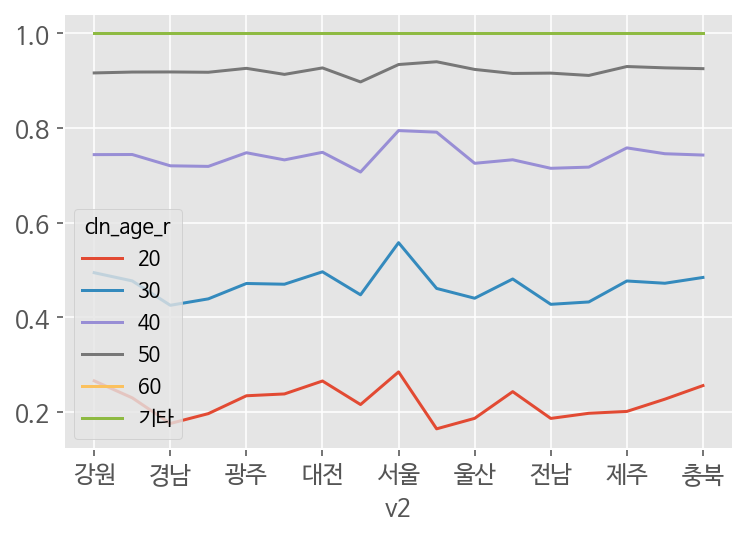

In [ ]:
graph1('v2', 'cln_age_r', 'usec', 'line')

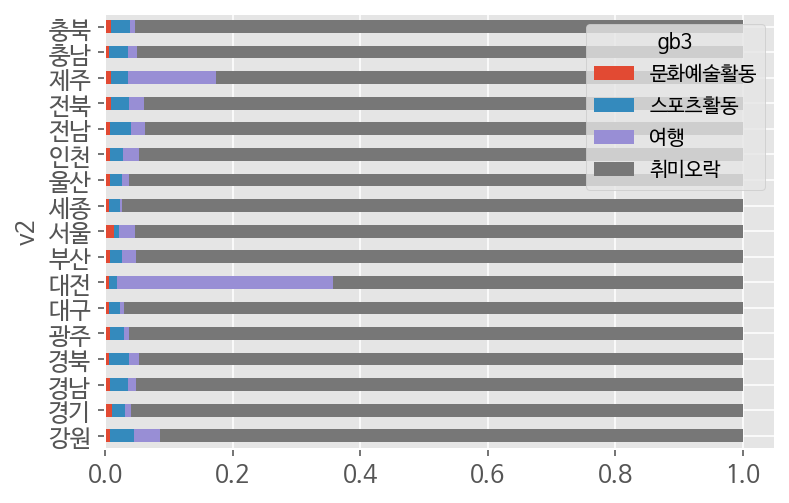

In [ ]:
graph1('v2', 'gb3', 'usec', 'barh')

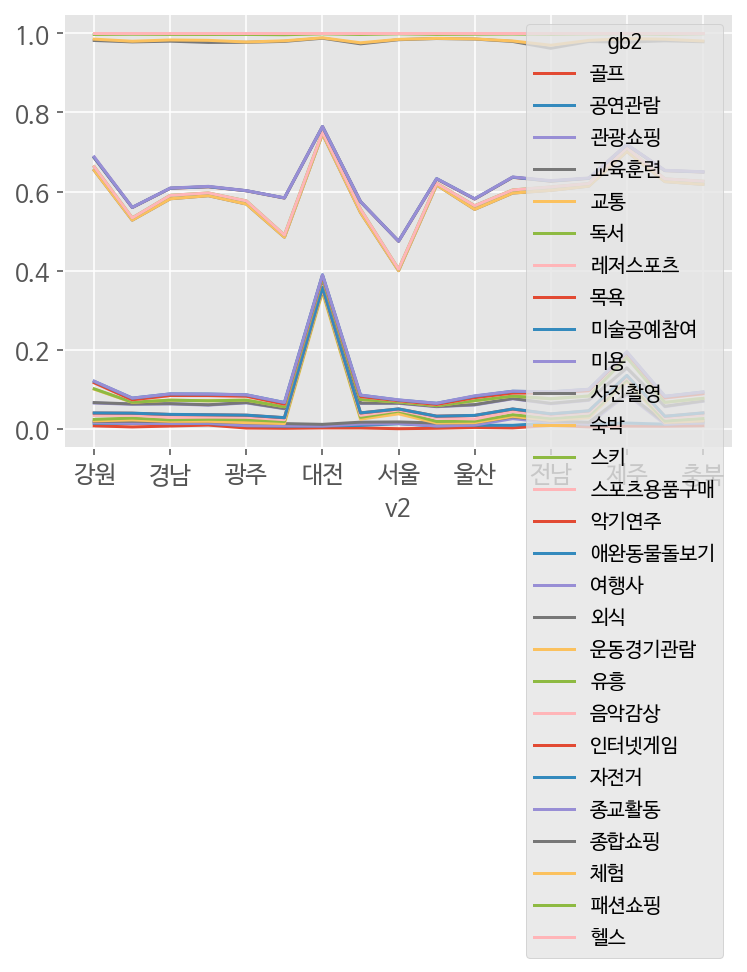

In [ ]:
graph1('v2', 'gb2', 'usec', 'line')

In [ ]:
shall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42586464 entries, 0 to 42586463
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   v1              object 
 1   v2              object 
 2   v3              object 
 3   gb3             object 
 4   gb2             object 
 5   sex_ccd         object 
 6   cln_age_r       object 
 7   ta_ym           int64  
 8   daw_ccd_r       object 
 9   apv_ts_dl_tm_r  object 
 10  vlm             float64
 11  usec            int64  
 12  divide          float64
dtypes: float64(2), int64(2), object(9)
memory usage: 4.1+ GB


In [ ]:
shall = shall.astype({'ta_ym':'object'})

In [ ]:
shall.info()

In [ ]:
shall = shall.astype({'ta_ym':'str'})

In [ ]:
shall.info()

In [ ]:
shall['ta_ym'].unique()

In [ ]:
shall['year']= shall['ta_ym'].str.slice(start=0, stop=4)

In [ ]:
shall['year'].unique()

array(['2017', '2018', '2019', '2020'], dtype=object)

In [ ]:
shall_2018 = shall[shall['year'] == '2018']

In [ ]:
shall_2018.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec,year


In [ ]:
df1 = shall_2018.groupby(['gb2','v2'])['usec'].sum()

In [ ]:
df1

Series([], Name: usec, dtype: int64)

In [ ]:
df2 = df1.reset_index()

In [ ]:
df_2017 = df2[df2['year'] == '2017']

,year,v2,gb2,usec
0,2017,강원,레저스포츠,2111
1,2017,강원,목욕,269
2,2017,강원,숙박,417
3,2017,강원,애완동물돌보기,454
4,2017,강원,외식,39263


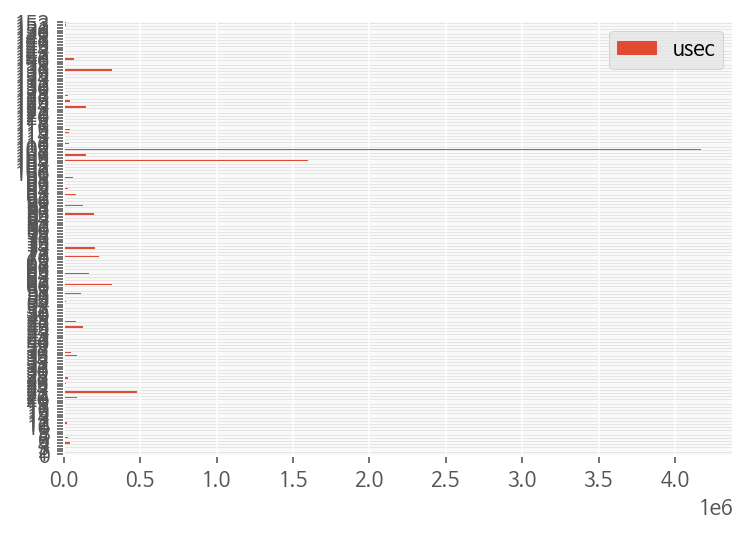

In [ ]:
sns.plot()

# 유동인구 예측 만들기

In [ ]:
shall.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,세종,세종,.,취미오락,외식,M,30,201701,RED,활동,351296766.0,19010
1,세종,세종,.,취미오락,종합쇼핑,M,50,201701,RED,휴식,72244196.0,2375
2,세종,세종,.,취미오락,종합쇼핑,M,30,201701,WHITE,휴식,532911085.0,19979
3,충남,세종,.,취미오락,종합쇼핑,M,50,201701,WHITE,활동,50972534.0,951
4,충남,세종,.,취미오락,종합쇼핑,M,40,201701,RED,휴식,19104457.0,408


In [ ]:
df1= shall.groupby(['ta_ym','v2']).size()

In [ ]:
df1.head()

ta_ym   v2
201701  강원     64096
        경기    161664
        경남     56833
        경북     64198
        광주     24091
dtype: int64

In [ ]:
df2 = df1.unstack()

In [ ]:
df2

v2,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
ta_ym,,,,,,,,,,,,,,,,,
201701,64096,161664,56833,64198,24091,38647,31072,71448,186012,5215,20186,47084,53979,42139,16201,53180,35378
201702,60226,159159,53223,60642,23064,37225,30806,69417,184505,5210,19692,46054,49392,39236,15943,51188,34414
201703,59219,167162,56479,66121,24523,38861,32526,71214,190631,5760,20446,47975,53844,41131,16573,56502,38257
201704,62549,171244,60008,70029,24959,39950,32787,72919,192207,5784,20845,48445,58692,43875,17513,59508,40238
201705,68673,175454,63305,73820,25797,40801,33170,76104,194175,5968,21662,49736,63503,47183,17852,62546,41865
201706,65718,172907,59541,69904,24919,38939,32658,73385,192692,5938,20984,48924,57325,44252,17816,59825,40563
201707,70963,174253,62454,71933,25252,39804,33005,77260,195692,5931,21844,49683,61428,45145,18100,60515,39921
201708,75171,174275,63882,74479,25328,39921,32922,79027,194383,5907,21698,50210,64462,47044,18413,61554,41361
201709,64873,171375,58541,69553,24823,38765,32686,73431,192510,6003,20913,48718,56627,44006,17878,60507,40826


In [ ]:
df3 = df2.T

In [ ]:
incomingPop = df2.reset_index()

In [ ]:
incomingPop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ta_ym   42 non-null     int64
 1   강원      42 non-null     int64
 2   경기      42 non-null     int64
 3   경남      42 non-null     int64
 4   경북      42 non-null     int64
 5   광주      42 non-null     int64
 6   대구      42 non-null     int64
 7   대전      42 non-null     int64
 8   부산      42 non-null     int64
 9   서울      42 non-null     int64
 10  세종      42 non-null     int64
 11  울산      42 non-null     int64
 12  인천      42 non-null     int64
 13  전남      42 non-null     int64
 14  전북      42 non-null     int64
 15  제주      42 non-null     int64
 16  충남      42 non-null     int64
 17  충북      42 non-null     int64
dtypes: int64(18)
memory usage: 6.0 KB


In [ ]:
incomingPop = incomingPop.astype({'ta_ym':'str'})

In [ ]:
incomingPop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ta_ym   42 non-null     object
 1   강원      42 non-null     int64 
 2   경기      42 non-null     int64 
 3   경남      42 non-null     int64 
 4   경북      42 non-null     int64 
 5   광주      42 non-null     int64 
 6   대구      42 non-null     int64 
 7   대전      42 non-null     int64 
 8   부산      42 non-null     int64 
 9   서울      42 non-null     int64 
 10  세종      42 non-null     int64 
 11  울산      42 non-null     int64 
 12  인천      42 non-null     int64 
 13  전남      42 non-null     int64 
 14  전북      42 non-null     int64 
 15  제주      42 non-null     int64 
 16  충남      42 non-null     int64 
 17  충북      42 non-null     int64 
dtypes: int64(17), object(1)
memory usage: 6.0+ KB


In [ ]:
incomingPop['ta_ym'] = incomingPop['ta_ym'].astype(str) + '01'

In [ ]:
incomingPop.head()

v2,ta_ym,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
0,20170101,64096,161664,56833,64198,24091,38647,31072,71448,186012,5215,20186,47084,53979,42139,16201,53180,35378
1,20170201,60226,159159,53223,60642,23064,37225,30806,69417,184505,5210,19692,46054,49392,39236,15943,51188,34414
2,20170301,59219,167162,56479,66121,24523,38861,32526,71214,190631,5760,20446,47975,53844,41131,16573,56502,38257
3,20170401,62549,171244,60008,70029,24959,39950,32787,72919,192207,5784,20845,48445,58692,43875,17513,59508,40238
4,20170501,68673,175454,63305,73820,25797,40801,33170,76104,194175,5968,21662,49736,63503,47183,17852,62546,41865


In [ ]:
incomingPop['ta_ym'] = pd.to_datetime(incomingPop['ta_ym'])

In [ ]:
incoming_ML = incomingPop.set_index('ta_ym')

In [ ]:
data_frame = incoming_ML.copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_frame.iloc[0:30,:]

v2,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
ta_ym,,,,,,,,,,,,,,,,,
2017-01-01,64096,161664,56833,64198,24091,38647,31072,71448,186012,5215,20186,47084,53979,42139,16201,53180,35378
2017-02-01,60226,159159,53223,60642,23064,37225,30806,69417,184505,5210,19692,46054,49392,39236,15943,51188,34414
2017-03-01,59219,167162,56479,66121,24523,38861,32526,71214,190631,5760,20446,47975,53844,41131,16573,56502,38257
2017-04-01,62549,171244,60008,70029,24959,39950,32787,72919,192207,5784,20845,48445,58692,43875,17513,59508,40238
2017-05-01,68673,175454,63305,73820,25797,40801,33170,76104,194175,5968,21662,49736,63503,47183,17852,62546,41865
2017-06-01,65718,172907,59541,69904,24919,38939,32658,73385,192692,5938,20984,48924,57325,44252,17816,59825,40563
2017-07-01,70963,174253,62454,71933,25252,39804,33005,77260,195692,5931,21844,49683,61428,45145,18100,60515,39921
2017-08-01,75171,174275,63882,74479,25328,39921,32922,79027,194383,5907,21698,50210,64462,47044,18413,61554,41361
2017-09-01,64873,171375,58541,69553,24823,38765,32686,73431,192510,6003,20913,48718,56627,44006,17878,60507,40826


In [ ]:
train = data_frame.iloc[0:30,:]
test = data_frame.iloc[30:, :]

In [ ]:
train.head(1)

v2,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
ta_ym,,,,,,,,,,,,,,,,,
2017-01-01,64096,161664,56833,64198,24091,38647,31072,71448,186012,5215,20186,47084,53979,42139,16201,53180,35378


In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[0.30572969, 0.14670571, 0.32640145, 0.23416304, 0.3290612 ,
        0.33776722, 0.17408056, 0.20206945, 0.13430318, 0.00454545,
        0.2295539 , 0.22149437, 0.28094567, 0.3005176 , 0.09794989,
        0.1692726 , 0.11547676],
       [0.06312688, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08091068, 0.        , 0.02839272, 0.        ,
        0.        , 0.01064483, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.46869693, 0.29439421, 0.36079284, 0.46747837,
        0.38859857, 0.68336252, 0.17878818, 0.45892192, 0.5       ,
        0.35037175, 0.40388946, 0.27267716, 0.19616977, 0.23917995,
        0.45156356, 0.46034978],
       [0.20875125, 0.70775988, 0.61347197, 0.61813512, 0.60717719,
        0.64726841, 0.77478109, 0.34842304, 0.56968164, 0.52181818,
        0.53578067, 0.50010235, 0.56960862, 0.48022774, 0.59605163,
        0.70700204, 0.69765213],
       [0.59265296, 0.95431918, 0.91157324, 0.867772

In [ ]:
train_sc

array([[0.30572969, 0.14670571, 0.32640145, 0.23416304, 0.3290612 ,
        0.33776722, 0.17408056, 0.20206945, 0.13430318, 0.00454545,
        0.2295539 , 0.22149437, 0.28094567, 0.3005176 , 0.09794989,
        0.1692726 , 0.11547676],
       [0.06312688, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08091068, 0.        , 0.02839272, 0.        ,
        0.        , 0.01064483, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.46869693, 0.29439421, 0.36079284, 0.46747837,
        0.38859857, 0.68336252, 0.17878818, 0.45892192, 0.5       ,
        0.35037175, 0.40388946, 0.27267716, 0.19616977, 0.23917995,
        0.45156356, 0.46034978],
       [0.20875125, 0.70775988, 0.61347197, 0.61813512, 0.60717719,
        0.64726841, 0.77478109, 0.34842304, 0.56968164, 0.52181818,
        0.53578067, 0.50010235, 0.56960862, 0.48022774, 0.59605163,
        0.70700204, 0.69765213],
       [0.59265296, 0.95431918, 0.91157324, 0.867772

In [ ]:
train_sc_df = pd.DataFrame(train_sc, index=train.index)
test_sc_df = pd.DataFrame(test_sc, index=test.index)

In [ ]:
train_sc_df.head()

NameError: ignored

In [ ]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['trade_price_idx_value'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['trade_price_idx_value'].shift(s)

train_sc_df.head(13)

NameError: ignored

In [ ]:
#하이퍼 파라미터 설정
timesteps = seq_length = 6
data_dim = 4
hidden_dim = 4
output_dim = 1
learing_rate = 0.0005
iterations = 50_000

# Framework 제작
x = data_frame.values
y = data_frame['강원'].values

dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = np.copy(x[i:i + seq_length + 1])
    _x[timesteps-2][data_dim-1] = 0
    _x[timesteps-1][data_dim-1] = 0
    _x[timesteps][data_dim-1] = 0
    _y = [y[i + seq_length]]
    dataX.append(_x)
    dataY.append(_y)

#학습데이터와 테스트데이터 분류

train_size = int(len(dataY) * 0.8)
test_size = len(dataY) - train_size 

trainX = np.array(dataX[:train_size])
testX = np.array(dataX[train_size : ])

trainY = np.array(dataY[:train_size])
testY = np.array(dataY[train_size : ])

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#LSTM모델 구축

X = tf.placeholder(tf.float32, [None, seq_length+1, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

def lstm_cell(): 
    cell = rnn.BasicLSTMCell(hidden_dim, state_is_tuple=True) 
    return cell 


multi_cells = rnn.MultiRNNCell([lstm_cell() for _ in range(5)], state_is_tuple=True)

outputs, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)

Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)

loss = tf.reduce_sum(tf.square(Y_pred - Y))  
train = tf.train.RMSPropOptimizer(learing_rate).minimize(loss)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(iterations):
    _  , cost = sess.run([train ,loss], feed_dict={X: trainX, Y: trainY})
    if (i+1) % (iterations/10) == 0:
        print("[step: {}] loss: {}".format(i+1, cost))

NameError: ignored

In [ ]:
#예측값 불러오기
train_predict = sess.run(Y_pred, feed_dict={X: trainX})
test_predict = sess.run(Y_pred, feed_dict={X: testX})

In [ ]:
# 데이터를 로딩한다
raw_dataframe = incomingPop.copy()
raw_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ta_ym   42 non-null     datetime64[ns]
 1   강원      42 non-null     int64         
 2   경기      42 non-null     int64         
 3   경남      42 non-null     int64         
 4   경북      42 non-null     int64         
 5   광주      42 non-null     int64         
 6   대구      42 non-null     int64         
 7   대전      42 non-null     int64         
 8   부산      42 non-null     int64         
 9   서울      42 non-null     int64         
 10  세종      42 non-null     int64         
 11  울산      42 non-null     int64         
 12  인천      42 non-null     int64         
 13  전남      42 non-null     int64         
 14  전북      42 non-null     int64         
 15  제주      42 non-null     int64         
 16  충남      42 non-null     int64         
 17  충북      42 non-null     int64         
dtypes: datetime6

array([Timestamp('2017-01-01 00:00:00'), 64096, 161664, 56833, 64198,
       24091, 38647, 31072, 71448, 186012, 5215, 20186, 47084, 53979,
       42139, 16201, 53180, 35378], dtype=object)